<a href="https://colab.research.google.com/github/GeorgeKMaina/Financial-Inclusion-East-Africa/blob/main/financial_inclusion_in_east_africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

#### a) Specyfying the Data Analytic Question

What demographic factors can be used to establish whether an individual has acess to bank services 

#### b) Metric of success

To identify the features that can help know whether an individual has acess to bank services using the chi squared test

#### c) Understanding the context

- Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.
- The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.

#### d) Recording the experimental design

- The project entailed the use of pandas cross tabulations to get summaries of the different columns
- The project also used the chi2_contingency() function to get the chi squared statistics
- The chi squared statistic is used to determine whether two column features are independent
The null and alternative hypothesis for the chi square test is:

- Ho: The features are independnet
- Ha: There is a relationship between the features

-- null hypothesis is rejected when p-value is less than 0.05

#### e) Relevance of the data

- The data provided is relevant to our research question which was to establish what factors can help predict whether an individual has access to bank services
- from our analysis we were able to this

# Reading the Data

In [1]:
# we will import the necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# we will read the dataset
fin=pd.read_csv(r'/content/Financial Dataset - 1.csv')

# Checking the Data

In [2]:
# we look at the first 5 rows
fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
#we will look at the last 5 rows
fin.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [4]:
# we will check for the shape of the dataset
print('shape of dataset:', fin.shape)
print('Dataset has '+ str(fin.shape[0]) + ' rows and ' + str(fin.shape[1]) + ' columns')

shape of dataset: (23524, 13)
Dataset has 23524 rows and 13 columns


In [5]:
# looking for the info of the dataset and the data types of the column
fin.dtypes

# we will need to convert the year column into datetime
# we will need to convert the gender of respondent into categorical data type
# we will need to convert the column Cell Phone Access into categorical data type
# we will need to convert the Has a Bank account into categorical data type
# we will need to convert the Has a marital_status categorical data type

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [6]:
fin.info()

# we can see that there are columns with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# Tidying Up the Dataset

In [7]:
# we will start by looking for duplicated records in the dataset
fin.duplicated().sum()

0

In [8]:
cols=fin[['country','year','Has a Bank account','Type of Location','Cell Phone Access','household_size','gender_of_respondent','marital_status','Level of Educuation','Type of Job']]
for col in cols:
  print ('\nlist of unique values in the column :%s'%col)
  print(cols[col].unique())
  

# we can see that most columns contain nan values
# the column year has records of 2029,2039 and 2056
# we will first drop all the nan values
# then proceed to look at the rows with the years 2029,2039,2056


list of unique values in the column :country
['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']

list of unique values in the column :year
[2018 2029 2056 2016 2039 2017]

list of unique values in the column :Has a Bank account
['Yes' 'No' nan]

list of unique values in the column :Type of Location
['Rural' 'Urban' nan]

list of unique values in the column :Cell Phone Access
['Yes' 'No' nan]

list of unique values in the column :household_size
[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]

list of unique values in the column :gender_of_respondent
['Female' 'Male' nan]

list of unique values in the column :marital_status
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know' nan]

list of unique values in the column :Level of Educuation
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6' nan]

list of unique values i

In [9]:
#checking for the number of missing values(null) in each column
missing=fin.isna().sum()
missing=missing[missing!=0]
print('number of columns with missing values:', len(missing))
#checking for the propotion of missing values in percentage
perc=(missing/len(fin))*100
missing_perc=pd.concat([missing,perc],axis=1)
missing_perc.rename(columns={0:'number of missing values',1:' percentage of missing values'},inplace=True)
missing_perc

number of columns with missing values: 11


,number of missing values,percentage of missing values
country,14,0.059514
Has a Bank account,36,0.153035
Type of Location,15,0.063765
Cell Phone Access,11,0.046761
household_size,28,0.119027
Respondent Age,34,0.144533
gender_of_respondent,34,0.144533
The relathip with head,4,0.017004
marital_status,32,0.136031
Level of Educuation,29,0.123278


In [10]:
# droping the null values will have no significant damage to our dataset
# we will drop all the rows with missing values
fin=fin.dropna()

In [11]:
# to check if all missing values have been dropped
fin.isna().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [12]:
#checking at this anomalies in years
fin[fin['year'].isin([2029,2056,2039])]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [13]:
# we will drop this observations
#this are anomalies in the dataset
# there are only 3 rows that will be dropped
fin.drop(fin[fin['year']>2019].index,inplace=True)

#to confirm if the have beem dropped
fin.year.value_counts()

2016    8683
2018    8157
2017    6500
Name: year, dtype: int64

In [14]:
# we will look for outliers
# we only have 2 numerical columns

numerical=fin[['Respondent Age','household_size']]
numerical.describe().T


#the household size can not have 0 people
#the respondent age is not logical
#th avrage life expectancy of an individual in east africa is 68
#any age above this we will treated it as an outlier

,count,mean,std,min,25%,50%,75%,max
Respondent Age,23340.0,38.807069,16.519905,16.0,26.0,35.0,49.0,100.0
household_size,23340.0,3.688560,2.281275,0.0,2.0,3.0,5.0,21.0


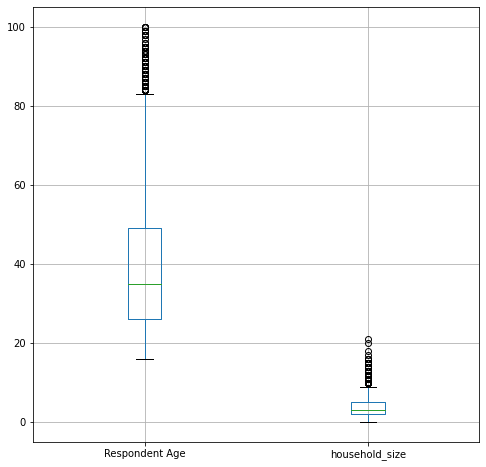

In [15]:
plt.figure(figsize=(8,8))
numerical.boxplot()
plt.show()

In [16]:
#we will get all records of where the household size is less than 1
#we will drop this observations from our dataset
fin[fin['household_size']<1]


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
15171,Tanzania,2017,uniqueid_369,No,Urban,Yes,0.0,30.0,Female,Head of Household,Married/Living together,Primary education,No Income
15897,Tanzania,2017,uniqueid_1095,No,Urban,Yes,0.0,24.0,Female,Head of Household,Single/Never Married,Primary education,Remittance Dependent
15918,Tanzania,2017,uniqueid_1116,No,Rural,No,0.0,27.0,Male,Parent,Divorced/Seperated,Secondary education,No Income
16006,Tanzania,2017,uniqueid_1204,No,Rural,Yes,0.0,22.0,Female,Head of Household,Divorced/Seperated,Tertiary education,Remittance Dependent
16132,Tanzania,2017,uniqueid_1330,No,Rural,No,0.0,18.0,Female,Other relative,Divorced/Seperated,Secondary education,Remittance Dependent
16137,Tanzania,2017,uniqueid_1335,No,Urban,Yes,0.0,23.0,Female,Head of Household,Divorced/Seperated,Primary education,No Income
16509,Tanzania,2017,uniqueid_1707,No,Urban,Yes,0.0,23.0,Female,Parent,Divorced/Seperated,Tertiary education,No Income
16561,Tanzania,2017,uniqueid_1759,No,Urban,No,0.0,87.0,Female,Head of Household,Widowed,No formal education,No Income
16702,Tanzania,2017,uniqueid_1900,No,Urban,Yes,0.0,32.0,Female,Head of Household,Single/Never Married,Primary education,Remittance Dependent
16987,Tanzania,2017,uniqueid_2185,No,Urban,No,0.0,75.0,Female,Head of Household,Married/Living together,Primary education,No Income


In [17]:
fin.drop(fin[fin['household_size']<1].index,inplace=True)

In [18]:
#we will also look for recordes where the family size is more than 10
fin[fin['household_size']>10]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
58,Kenya,2018,uniqueid_59,No,Rural,Yes,11.0,21.0,Male,Child,Single/Never Married,Other/Dont know/RTA,Informally employed
348,Kenya,2018,uniqueid_349,No,Urban,Yes,12.0,23.0,Female,Child,Single/Never Married,Secondary education,Self employed
372,Kenya,2018,uniqueid_373,No,Urban,Yes,16.0,33.0,Female,Spouse,Married/Living together,No formal education,Remittance Dependent
507,Kenya,2018,uniqueid_508,Yes,Rural,Yes,11.0,41.0,Male,Head of Household,Married/Living together,Primary education,Self employed
674,Kenya,2018,uniqueid_675,No,Urban,Yes,12.0,34.0,Female,Spouse,Married/Living together,No formal education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23426,Uganda,2018,uniqueid_2007,No,Urban,Yes,13.0,19.0,Male,Parent,Single/Never Married,Secondary education,Self employed
23452,Uganda,2018,uniqueid_2036,No,Rural,Yes,13.0,48.0,Female,Spouse,Married/Living together,Primary education,Self employed
23461,Uganda,2018,uniqueid_2046,No,Urban,Yes,13.0,25.0,Female,Spouse,Married/Living together,Primary education,Dont Know/Refuse to answer
23468,Uganda,2018,uniqueid_2053,No,Urban,Yes,12.0,42.0,Male,Head of Household,Married/Living together,Primary education,Self employed


In [19]:
#we will drop this records
fin.drop(fin[fin['household_size']>10].index,inplace=True)

In [20]:
# we will get all the valus where the age is more than 68
#this is the average life expectancy of the population in east africa
fin[fin['Respondent Age']>68]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent
11,Kenya,2018,uniqueid_12,Yes,Rural,Yes,3.0,69.0,Male,Head of Household,Married/Living together,Secondary education,Other Income
39,Kenya,2018,uniqueid_40,No,Rural,No,3.0,70.0,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing
42,Kenya,2018,uniqueid_43,Yes,Rural,Yes,3.0,80.0,Male,Head of Household,Widowed,Primary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,Uganda,2018,uniqueid_1976,No,Rural,No,2.0,85.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23398,Uganda,2018,uniqueid_1979,No,Rural,Yes,5.0,79.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23413,Uganda,2018,uniqueid_1994,No,Rural,No,5.0,90.0,Male,Head of Household,Married/Living together,No formal education,Self employed
23425,Uganda,2018,uniqueid_2006,No,Rural,No,4.0,80.0,Female,Head of Household,Widowed,Primary education,Self employed


In [21]:
#we will drop this values
fin.drop(fin[fin['Respondent Age']>68].index,inplace=True)

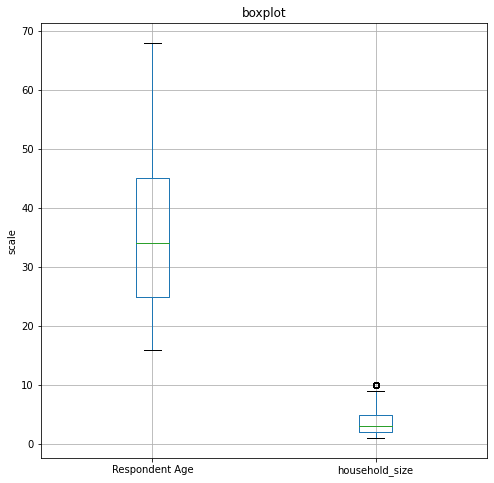

In [22]:
#looking at the subplots again
plt.figure(figsize=(8,8))
plt.title('boxplot')
plt.ylabel('scale')
fin[['Respondent Age','household_size']].boxplot()
plt.show()

In [23]:
fin[['Respondent Age','household_size']].describe()

,Respondent Age,household_size
count,21561.000000,21561.000000
mean,36.090766,3.699365
std,13.361916,2.156873
min,16.000000,1.000000
25%,25.000000,2.000000
50%,34.000000,3.000000
75%,45.000000,5.000000
max,68.000000,10.000000


In [24]:
fin.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [25]:
#checking for anormalies
#we will first start with renaming some of the columns that were not gramatically correct
fin.rename(columns={'The relathip with head':'The relationship with household head','Level of Educuation':'Level of education'},inplace=True)

In [26]:
fin['Level of education'].value_counts()

Primary education                  12016
Secondary education                 4092
No formal education                 3530
Tertiary education                  1126
Vocational/Specialised training      773
6                                     19
Other/Dont know/RTA                    5
Name: Level of education, dtype: int64

In [27]:
# to have a loook at the rows where the level of education is 6 and 'Other/Dont know/RTA'
fin[fin['Level of education'].isin(['6','Other/Dont know/RTA'])]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relationship with household head,marital_status,Level of education,Type of Job
1186,Kenya,2018,uniqueid_1187,Yes,Urban,Yes,1.0,48.0,Female,Head of Household,Married/Living together,Other/Dont know/RTA,Formally employed Government
1924,Kenya,2018,uniqueid_1925,Yes,Urban,Yes,5.0,31.0,Female,Child,Single/Never Married,Other/Dont know/RTA,Formally employed Government
3402,Kenya,2018,uniqueid_3403,Yes,Urban,Yes,3.0,46.0,Female,Spouse,Married/Living together,Other/Dont know/RTA,Formally employed Private
4204,Kenya,2018,uniqueid_4205,Yes,Rural,Yes,4.0,47.0,Male,Head of Household,Married/Living together,Other/Dont know/RTA,Self employed
5030,Kenya,2018,uniqueid_5031,Yes,Urban,Yes,1.0,26.0,Female,Head of Household,Single/Never Married,Other/Dont know/RTA,Self employed
6867,Rwanda,2016,uniqueid_800,No,Rural,No,5.0,34.0,Female,Spouse,Married/Living together,6,Informally employed
7937,Rwanda,2016,uniqueid_1870,No,Rural,No,8.0,31.0,Female,Spouse,Married/Living together,6,Informally employed
8453,Rwanda,2016,uniqueid_2386,No,Urban,Yes,3.0,36.0,Female,Head of Household,Divorced/Seperated,6,Informally employed
8778,Rwanda,2016,uniqueid_2711,No,Rural,Yes,4.0,44.0,Male,Head of Household,Married/Living together,6,Informally employed
9878,Rwanda,2016,uniqueid_3811,No,Rural,No,2.0,48.0,Female,Spouse,Married/Living together,6,Formally employed Private


In [28]:
fin.drop(fin[fin['Level of education'].isin(['6','Other/Dont know/RTA'])].index,inplace=True)

##univariate analysis

##### Has a Bank account

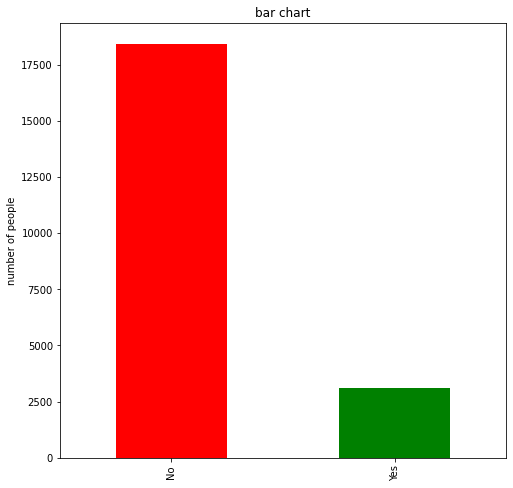

In [29]:
# this is our column of interest
plt.figure(figsize=(8,8))
plt.title('bar chart')
plt.ylabel('number of people')
color=['red','green']
fin['Has a Bank account'].value_counts().plot(kind='bar',color=color)
plt.show()

# we can see that most respondents did not have a bank account

##### Type of Location

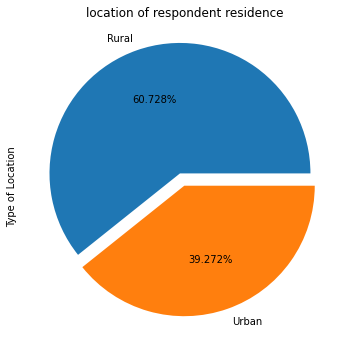

In [30]:
plt.figure(figsize=(6,6))
plt.title('location of respondent residence')
explode=0.1,0
fin['Type of Location'].value_counts().plot(kind='pie',explode=explode, autopct='%1.3f%%')
plt.show()

#we can see most responddnents were in te rural areas

##### Cell Phone Acess

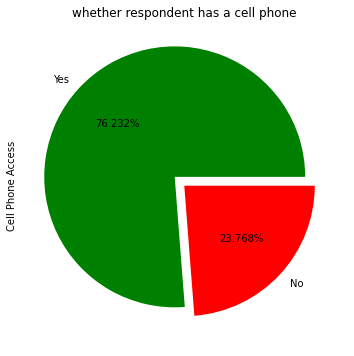

In [31]:
plt.figure(figsize=(6,6))
plt.title('whether respondent has a cell phone')
explode=0.1,0
color=['green','red']
fin['Cell Phone Access'].value_counts().plot(kind='pie',explode=explode, autopct='%1.3f%%',colors=color)
plt.show()

# most respondndetns have access to mobile phones

##### gender_of_respondent

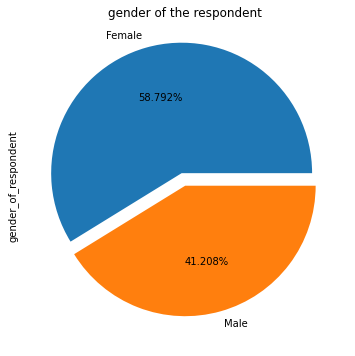

In [32]:
plt.figure(figsize=(6,6))
plt.title('gender of the respondent')
explode=0.1,0
fin['gender_of_respondent'].value_counts().plot(kind='pie',explode=explode, autopct='%1.3f%%')
plt.show()

#most respondnents were female

##### The relationship with head

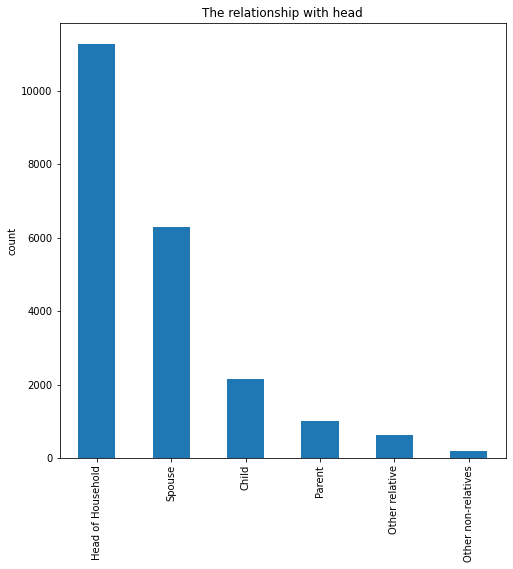

In [33]:
plt.figure(figsize=(8,8))
plt.title('The relationship with head')
plt.ylabel('count')
fin['The relationship with household head'].value_counts().plot(kind='bar')
plt.show()

##### marital_status

In [34]:
fin['marital_status'].value_counts()

Married/Living together    10110
Single/Never Married        7633
Divorced/Seperated          1969
Widowed                     1818
Dont know                      7
Name: marital_status, dtype: int64

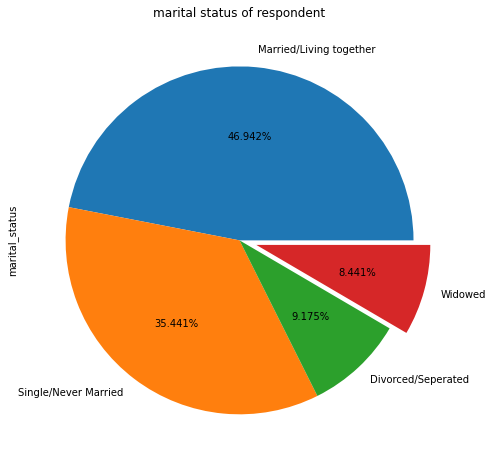

In [35]:
#we will relabel the status 'Dont Know' into divorced or separated
fin['marital_status']=fin['marital_status'].replace('Dont know','Divorced/Seperated')

# we will make a plot to show the martial status
plt.figure(figsize=(8,8))
plt.title('marital status of respondent')
explode=0,0,0,0.1
fin['marital_status'].value_counts().plot(kind='pie',explode=explode,autopct='%1.3f%%')
plt.show()

#most respondnets were married/ living together

##### Type of Job

In [36]:
fin['Type of Job'].value_counts()

Self employed                   6014
Informally employed             5391
Farming and Fishing             4879
Remittance Dependent            2110
Formally employed Private       1029
Other Income                     974
No Income                        541
Formally employed Government     382
Dont Know/Refuse to answer       117
Government Dependent             100
Name: Type of Job, dtype: int64

In [37]:
#we will combine the remintance dependnent and government dependent into one label known as dependnent 
#those who refused to answer can be labelled into other income
fin["Type of Job"]= fin["Type of Job"].replace('Government Dependent', "dependent")
fin["Type of Job"]= fin["Type of Job"].replace('Remittance Dependent', "dependent")
fin["Type of Job"]= fin["Type of Job"].replace('Dont Know/Refuse to answer', "Other Income")

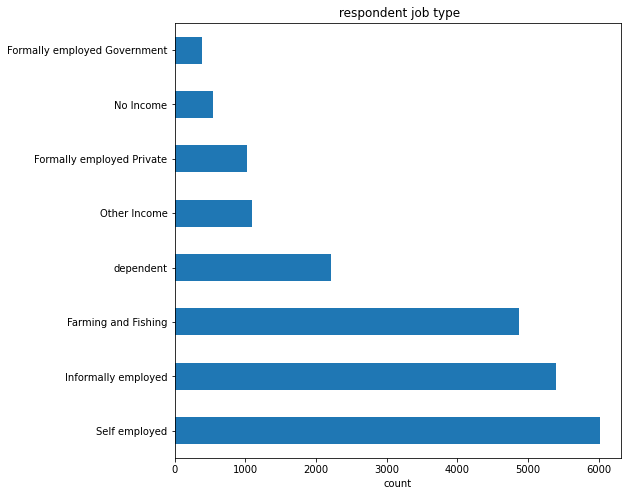

In [38]:
plt.figure(figsize=(8,8))
plt.title(' respondent job type')
plt.xlabel('count')
fin['Type of Job'].value_counts().plot(kind='barh')
plt.show()

## Bivariate Analysis

###### we will look at the relationship between 'Has a Bank account' and the other features

##### Has a Bank account and country

In [39]:
pd.crosstab(fin.country,fin['Has a Bank account'],margins=True,margins_name='Total')

# In Rwanda, most of the respondnents had bank accounts
#Uganda had the least

Has a Bank account,No,Yes,Total
country,,,
Kenya,4098,1393,5491
Rwanda,7116,958,8074
Tanzania,5475,578,6053
Uganda,1750,169,1919
Total,18439,3098,21537


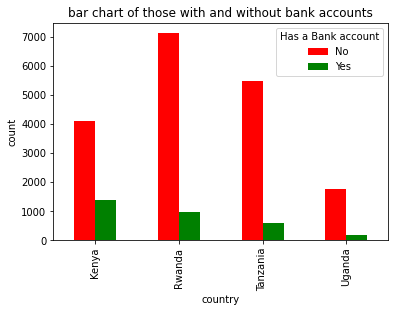

In [40]:
a=pd.crosstab(fin.country,fin['Has a Bank account'])
color=['red','green']
a.plot.bar(color=color)
plt.ylabel('count')
plt.title('bar chart of those with and without bank accounts')
plt.show()

- most people had no bank accounts in all the countries compared to those that had

In [41]:
stats.chi2_contingency(a)
#the chi2 statistic is 749, the degrees of freedom are 3 and the p-values is 4.3557
#the p-value is greater than the threshold of 0.05
#because of this we fail to reject the null hypothesis that the country and acess to bank services are independent

(742.967274101365,
 1.0109148593485178e-160,
 3,
 array([[4701.14449552,  789.85550448],
        [6912.591633  , 1161.408367  ],
        [5182.30333844,  870.69666156],
        [1642.96053304,  276.03946696]]))

##### has bank account and location

In [42]:
pd.crosstab(fin['Type of Location'],fin['Has a Bank account'],margins=True,margins_name='Total')

#most respondnents in rural areas did not have bank accounts
# the proportion of those who had bank accounts in the urban and rural areas was not that different.
# this can imply if there were more respondnents from the urban areas aswell, then the number of those with accounts would be higher 

Has a Bank account,No,Yes,Total
Type of Location,,,
Rural,11552,1527,13079
Urban,6887,1571,8458
Total,18439,3098,21537


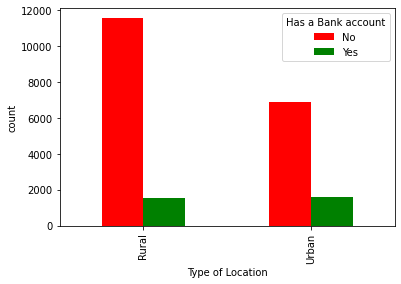

In [43]:
loc_acc=pd.crosstab(fin['Type of Location'],fin['Has a Bank account'])
color=['red','green']
loc_acc.plot.bar(color=color)

plt.ylabel('count')
plt.show()

- Across all locations, the number of people without bank accounts is more than those with bank accounts
- The number of people with acess to bank services is slightly higher in urban areas than in rural areas

In [44]:
stats.chi2_contingency(loc_acc)

# we have a chi2 statistic of 200 and a pvalue that is less than the 0.05 threshold
#because of this we reject the null hypothesis that says there is no dependence between the location and accesibily of bank services
# this result implies that there is a relationship between the location of the respondent and the the accesibility of bank services

(197.94531472524076,
 5.86437220821097e-45,
 1,
 array([[11197.64502948,  1881.35497052],
        [ 7241.35497052,  1216.64502948]]))

##### has bank account and has accesss to mobile phones

In [45]:
pd.crosstab(fin['Cell Phone Access'],fin['Has a Bank account'],margins=True,margins_name='Total')

#Most people who had acess to cell phones did not have bank accounts
#thos who had bank accounts and had cell phones were more than those who had bank accounts did not have cell phonescell

Has a Bank account,No,Yes,Total
Cell Phone Access,,,
No,5055,64,5119
Yes,13384,3034,16418
Total,18439,3098,21537


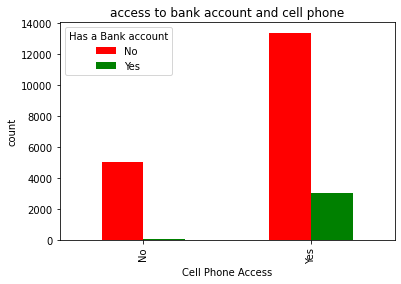

In [46]:
cell_acc=pd.crosstab(fin['Cell Phone Access'],fin['Has a Bank account'])
color=['red','green']
cell_acc.plot.bar(color=color)
plt.title('access to bank account and cell phone')
plt.ylabel('count')
plt.show()

- we can see that most people who had phone cell devices didn't have bank accounts
- We can se that most people who had bank accounts had phone cells services

In [47]:
#we will run a chi2 contignecy test to test for independnecy of the tow columns
stats.chi2_contingency(cell_acc)


(939.2249664243798,
 2.9173194201137017e-206,
 1,
 array([[ 4382.6550123,   736.3449877],
        [14056.3449877,  2361.6550123]]))

- From the chi2_contingency() test, we had a chi2 statistic of 942 and a p-value that was less than the 0.05 thresshold
- because of this, we reject the null hypothesis which states that the two columns are independent
- By rejecting the null, we imply that there is an influence by phone cell acess to bank access.

#### has bank account and gender

In [48]:
pd.crosstab(fin['gender_of_respondent'],fin['Has a Bank account'],margins=True,margins_name='Total')

#most males had bank accounts than the females respondnents
#the number of females who did not have bank accounts were more than the male respondnets

Has a Bank account,No,Yes,Total
gender_of_respondent,,,
Female,11266,1396,12662
Male,7173,1702,8875
Total,18439,3098,21537


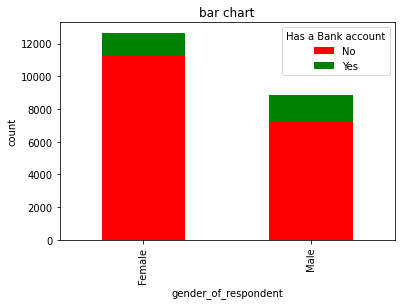

In [49]:
gend_acc=pd.crosstab(fin['gender_of_respondent'],fin['Has a Bank account'])
color=['red','green']
gend_acc.plot.bar(stacked=True,color=color)
plt.title('bar chart')
plt.ylabel('count')
plt.show()

- we can see that most females did not have bank accounts
- we can also see that most males had bank accounts than their female counterparts

In [50]:
#we will run a chi squared test for independnence
stats.chi2_contingency(gend_acc)

(280.9190467532352,
 4.735011961490657e-63,
 1,
 array([[10840.62859265,  1821.37140735],
        [ 7598.37140735,  1276.62859265]]))

- from the test above, we can see that the chi2 statistic is 279 while the p-value is less than the threshold of 0.05
- since the p-value is less than the 0.05 threshold, we fail to reject the null
- This implies that there is a relationship betwee the gender of the respondnent and them having a bank account

has bank account and household size

In [51]:
pd.crosstab(fin['household_size'],fin['Has a Bank account'],margins=True,margins_name='Total')

Has a Bank account,No,Yes,Total
household_size,,,
1.0,2812,630,3442
2.0,4045,573,4618
3.0,2768,467,3235
4.0,2603,452,3055
5.0,2225,400,2625
6.0,1700,263,1963
7.0,1171,173,1344
8.0,644,82,726
9.0,309,34,343


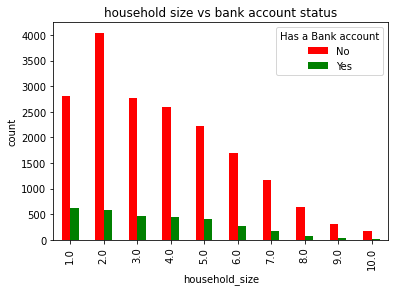

In [52]:
siz_acc=pd.crosstab(fin['household_size'],fin['Has a Bank account'])
color=['red','green']
siz_acc.plot.bar(color=color)
plt.ylabel('count')
plt.title('household size vs bank account status')
plt.show()

- at all household sizes, the number of those with no bank account is more than those with bank accounts
- Small sized families have  more bank accounts than large families
- as the family size increase, the number of bank account decreases

In [53]:
#we will do a chi2 contigency test
stats.chi2_contingency(siz_acc)

(75.12618544936437,
 1.4921849503074218e-12,
 9,
 array([[2946.88387426,  495.11612574],
        [3953.72159539,  664.27840461],
        [2769.65988764,  465.34011236],
        [2615.55207318,  439.44792682],
        [2247.40562752,  377.59437248],
        [1680.63133213,  282.36866787],
        [1150.67168129,  193.32831871],
        [ 621.56818498,  104.43181502],
        [ 293.661002  ,   49.338998  ],
        [ 159.24474161,   26.75525839]]))

- we have a chi2 test statistic of 76.88 and a p-value that is less than 0.05 threshold
- because of this we reject the null hypothesis that there is independnece between the two columns
- this implies that there is some level of influence that the family size has on access to bank services


#### has bank account and marital status 

In [54]:
pd.crosstab(fin['marital_status'],fin['Has a Bank account'],margins=True,margins_name='Total')

Has a Bank account,No,Yes,Total
marital_status,,,
Divorced/Seperated,1753,223,1976
Married/Living together,8338,1772,10110
Single/Never Married,6702,931,7633
Widowed,1646,172,1818
Total,18439,3098,21537


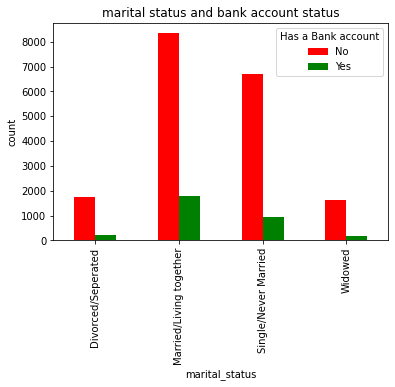

In [55]:
marital_acc=pd.crosstab(fin['marital_status'],fin['Has a Bank account'])
color=['red','green']
marital_acc.plot.bar(color=color)
plt.title('marital status and bank account status')
plt.ylabel('count')
plt.show()


- we can see that in all the marital status groups, the number of people without bank accounts was more than those with bank accounts
- married/people living together had bank accounts

#### type respondnent job and bank account status 

In [56]:
pd.crosstab(fin['Type of Job'],fin['Has a Bank account'],margins=True,margins_name='Total')

Has a Bank account,No,Yes,Total
Type of Job,,,
Farming and Fishing,4314,565,4879
Formally employed Government,87,295,382
Formally employed Private,467,562,1029
Informally employed,4962,429,5391
No Income,529,12,541
Other Income,909,182,1091
Self employed,5193,821,6014
dependent,1978,232,2210
Total,18439,3098,21537


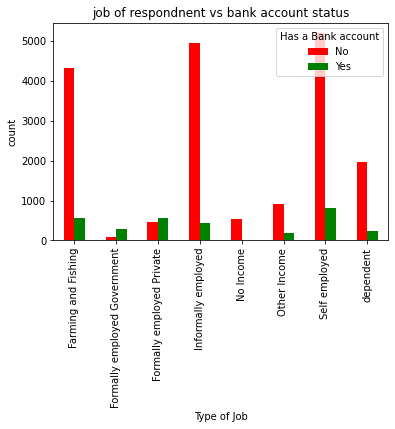

In [57]:
job_acc=pd.crosstab(fin['Type of Job'],fin['Has a Bank account'])
color=['red','green']
job_acc.plot.bar(color=color)
plt.title('job of respondnent vs bank account status')
plt.ylabel('count')
plt.show()

- we can see that individuals who are self employed have more bank accounts folowed by those that are formally employed in the private sector then farming and fishing follows
- those employed by government have more bank accounts

In [58]:
stats.chi2_contingency(job_acc)

(2888.6702026697976, 0.0, 7, array([[4177.17792636,  701.82207364],
        [ 327.05102846,   54.94897154],
        [ 880.98300599,  148.01699401],
        [4615.52904304,  775.47095696],
        [ 463.1795979 ,   77.8204021 ],
        [ 934.06458653,  156.93541347],
        [5148.91331197,  865.08668803],
        [1892.10149974,  317.89850026]]))

- we have a chi squared statistic of 2898.176 and a p-value of 0.0
- the p-value is less than the p-value thresshold
- because of this we reject the null hypothesis
- this implies that there is no independence between the two columns
- therefore they do influence each other

#### bank account access and level of education of the respondent

In [59]:
pd.crosstab(fin['Level of education'],fin['Has a Bank account'],margins=True,margins_name='Total')

Has a Bank account,No,Yes,Total
Level of education,,,
No formal education,3415,115,3530
Primary education,11010,1006,12016
Secondary education,3138,954,4092
Tertiary education,545,581,1126
Vocational/Specialised training,331,442,773
Total,18439,3098,21537


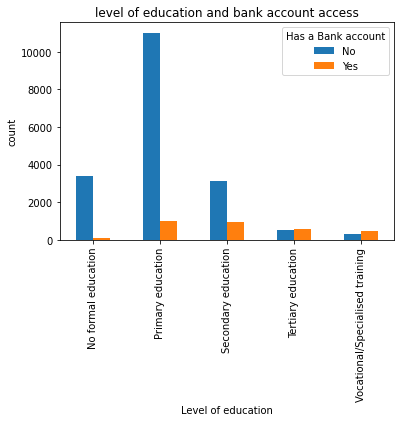

In [60]:
edu_acc=pd.crosstab(fin['Level of education'],fin['Has a Bank account'])
color=['red','green']
edu_acc.plot.bar()
plt.ylabel('count')
plt.title('level of education and bank account access')
plt.show()

- we can see that most people who attained the primary level of education do not have bank accounts
- Those with secondary education have the most acess to the banking services

In [61]:
# to look if the columns are independnet
#we will use the the chi square statistic
stats.chi2_contingency(edu_acc)

(3388.2244908559474, 0.0, 4, array([[ 3022.22547244,   507.77452756],
        [10287.55276965,  1728.44723035],
        [ 3503.38431536,   588.61568464],
        [  964.02999489,   161.97000511],
        [  661.80744765,   111.19255235]]))

- the chi squared stat is 3388.22 while the pvalue is 0.0
- the pvalue is less than the threshold of 0.05
- this is to imply that the two column features are not independnent of each other
- in some way, the level of education influences whether an indiividual has a bank account or not

#### bank account acess with years

In [62]:
pd.crosstab(fin['year'],fin['Has a Bank account'],margins=True,margins_name='Total')

#the number of people with bank accounts dropped from the year 2016 to 2017 
#the number of people with bank accounts was highest in 2018

Has a Bank account,No,Yes,Total
year,,,
2016,7116,958,8074
2017,5475,578,6053
2018,5848,1562,7410
Total,18439,3098,21537


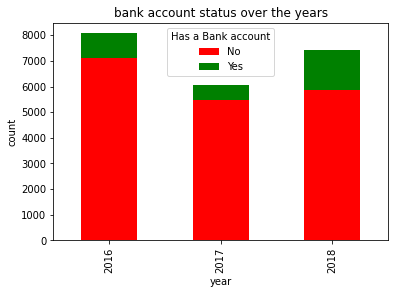

In [63]:
year_acc=pd.crosstab(fin['year'],fin['Has a Bank account'])
color=['red','green']
year_acc.plot.bar(stacked=True,color=color)
plt.title('bank account status over the years')
plt.ylabel('count')
plt.show()

### bank account status with family head

In [64]:
pd.crosstab(fin['The relationship with household head'],fin['Has a Bank account'],margins=True,margins_name='Total')

Has a Bank account,No,Yes,Total
The relationship with household head,,,
Child,1960,186,2146
Head of Household,9189,2084,11273
Other non-relatives,165,20,185
Other relative,566,64,630
Parent,957,60,1017
Spouse,5602,684,6286
Total,18439,3098,21537


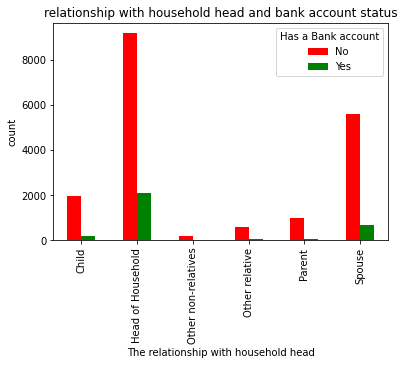

In [65]:
head_acc=pd.crosstab(fin['The relationship with household head'],fin['Has a Bank account'])
color=['red','green']
head_acc.plot.bar(color=color)
plt.title('relationship with household head and bank account status')
plt.ylabel('count')
plt.show()

- we can see that most household head do not have access to bank accounts
- this is a worrying observation
- most parents did not have bank accounts

In [66]:
# we will calculate a chi square
stats.chi2_contingency(head_acc)

(344.13409797361066,
 3.2056855350655547e-72,
 5,
 array([[1837.30761016,  308.69238984],
        [9651.42995775, 1621.57004225],
        [ 158.38858708,   26.61141292],
        [ 539.37735061,   90.62264939],
        [ 870.70915169,  146.29084831],
        [5381.78734271,  904.21265729]]))

- the chi2 statistic is 344.75 while the p-value is less than 0.05 threshold
- we fail to reject the null hypothesis that states that there is independnece between the two features
- this implies that the feature relationship with head has an influence on whether there the respondent has a bank account or not

## Multivariate Analysis

We will look at the relationships between different features with 'has bank account' column

##### country, has bank account, location of respondent

In [67]:
pd.crosstab(index=[fin['country']],columns=[fin['Has a Bank account'],fin['Type of Location']],margins=True,margins_name='Total')

Has a Bank account     No         Yes        Total
Type of Location    Rural Urban Rural Urban       
country                                           
Kenya                2585  1513   516   877   5491
Rwanda               6312   804   593   365   8074
Tanzania             1347  4128   360   218   6053
Uganda               1308   442    58   111   1919
Total               11552  6887  1527  1571  21537

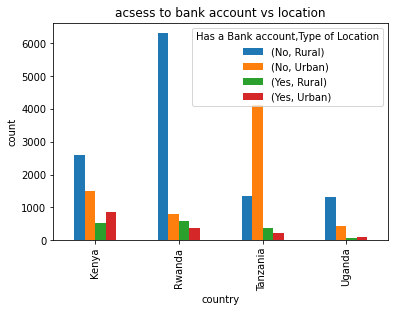

In [68]:
a=pd.crosstab(index=[fin['country']],columns=[fin['Has a Bank account'],fin['Type of Location']])
a.plot.bar()
plt.title('acsess to bank account vs location')
plt.ylabel('count')
plt.show()

- We can see that apart from Tanzania, most people in the rural areas had no bank accounts. In Tanzania we observe that most people in urban areas had no acess to bank services
- we can see that the number of people without bank accounts in the urban areas is more than those with bank account. this observation cuts across all the countries
- We can also see that the number of people without access to bank accounts are more in rural areas than in urban areas. This observation cuts across all the countries
- most people in rural areas have no bank accounts compared to those who have bank accounts in rural areas 

##### country, type of job, has bank account, cell phone acesss and gender of respondnent

In [69]:
pd.crosstab(index=[fin['country'],fin['Type of Job']],columns=[fin['Has a Bank account'],fin['Cell Phone Access'],fin['gender_of_respondent']],margins=True,margins_name='Total')

Has a Bank account                        No               ...    Yes        Total
Cell Phone Access                         No          Yes  ...    Yes             
gender_of_respondent                  Female  Male Female  ... Female  Male       
country  Type of Job                                       ...                    
Kenya    Farming and Fishing             176    87    539  ...    113   136   1377
         Formally employed Government      1     0     25  ...     94   115    256
         Formally employed Private         5     5     79  ...     86   134    407
         Informally employed             144   107    470  ...     65   111   1382
         Other Income                     17    16     17  ...     20    27    128
         Self employed                    44    18    335  ...    173   178    926
         dependent                       238   142    404  ...     74    37   1015
Rwanda   Farming and Fishing             305   144   1619  ...    122   176   3502
         Formally employed Government      1     0     25  ...     34    48    126
         Formally employed Private         4     3     49  ...     20    36    156
         Informally employed             411   207   1135  ...     72   109   2767
         Other Income                     36    14    127  ...     39    46    344
         Self employed                    17    11    215  ...     83    94    589
         dependent                        54    12    334  ...     52    13    590
Tanzania Formally employed Private         8     7     48  ...    100   131    361
         Informally employed             314   188    296  ...     27    38   1242
         No Income                       144    38    119  ...      5     1    325
         Other Income                      4     2      9  ...      1     3     28
         Self employed                   901   419    932  ...     69   147   3496
         dependent                       235    31    248  ...     26    18    601
Uganda   Formally employed Private         5     4     29  ...     26    26    105
         No Income                        66    25    102  ...      4     0    216
         Other Income                    124    56    256  ...     29    13    591
         Self employed                   192    71    406  ...     30    31   1003
         dependent                         2     0      0  ...      0     2      4
Total                                   3448  1607   7818  ...   1364  1670  21537

[26 rows x 9 columns]

- We can see that there are more males who have access to cell phones and bank accounts compared to their female counterparts
- This observation was across all types of job or income streams apart from dependent where the female population had the most bank accounts
- this can imply most females are dependnent on aid

- We can also see that there more females who have access to bank accounts but they do not have acesst o mobile phones
- this observation cuts across all countries and income streams

-In overall most females who had acess to bank services and acess to mobile phones aswell were more compared to the females who had acess to banks services but with no acess to mobile phones
- Also there were more males who had acess to bank accounts and acess to mobile phones than those who had acess to bank accounts but with no access to mobile phones

##### type of location, has a bank account, cell phone acesss

In [70]:
pd.crosstab(index=[fin['Type of Location']], columns=[fin['Has a Bank account'],fin['Cell Phone Access']],margins=True,margins_name='Total')

Has a Bank account    No        Yes        Total
Cell Phone Access     No    Yes  No   Yes       
Type of Location                                
Rural               2674   8878  35  1492  13079
Urban               2381   4506  29  1542   8458
Total               5055  13384  64  3034  21537

<Figure size 576x576 with 0 Axes>

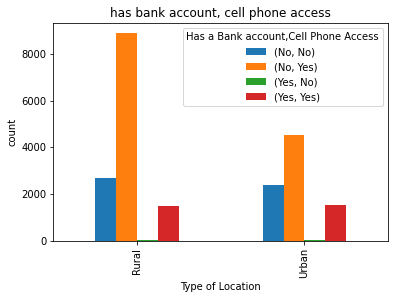

In [71]:
a=pd.crosstab(index=[fin['Type of Location']], columns=[fin['Has a Bank account'],fin['Cell Phone Access']])
plt.figure(figsize=(8,8))
a.plot.bar()
plt.title('has bank account, cell phone access')
plt.ylabel('count')
plt.show()

- We can see that most people in rural areas had acess to phone cells and  but lacked acess to bank accounts than those in urban areas
- we can also see that the number of people who have neither bank accounts and phone cells are almost proportional in both urban and rural areas. Thos ein the rural areas are slightly more
- We can also see that there proportion of people who had access to bank accounts but no acess to cell phones were more in the urban areas
- We can also see that the number of people who had both acess to bank accounts and cell phones were more in urban areas. 

##### level of education, has bank account and gender of respondent

In [72]:
pd.crosstab(index=[fin['Level of education']],columns=[fin['Has a Bank account'],fin['gender_of_respondent']],margins=True,margins_name='Total')

Has a Bank account                  No          Yes        Total
gender_of_respondent            Female  Male Female  Male       
Level of education                                              
No formal education               2399  1016     59    56   3530
Primary education                 6598  4412    441   565  12016
Secondary education               1767  1371    419   535   4092
Tertiary education                 298   247    269   312   1126
Vocational/Specialised training    204   127    208   234    773
Total                            11266  7173   1396  1702  21537

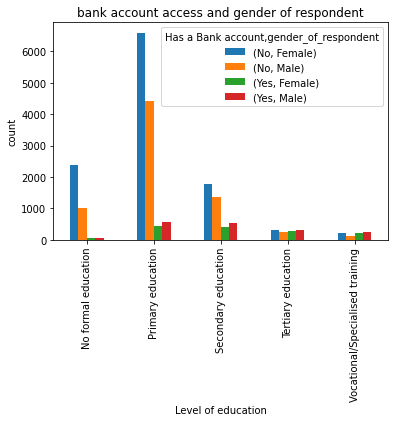

In [73]:
a=pd.crosstab(index=[fin['Level of education']],columns=[fin['Has a Bank account'],fin['gender_of_respondent']])
a.plot.bar()
plt.ylabel('count')
plt.title('bank account access and gender of respondent')
plt.show()

- Across all levels of education attained by respondnents, most males and females did not have acess to bank accounts
- Across all level of education, males counterparts had more bank accounts than the females
- For both males and females that only achieved primary scholl education, they did not have acess to bank services
- Most people who reached secondary school have acess to banks than the other people in the other levels of education

## Implementing the solution

- we have been able to establish that the columns that explain whether an individual has a bank account or not are the following
- - Type of Location
- - gender_of_respondent
-- Respondent Age
-- Level of education
-- Relationship with household head
-- respondent job

## Challenging the solution

- The data seams to be biased in the way that it was collected
- It would have been good if the number of respondents from the rural areas and urban areas were almost same(symetrical)
- Instead of looking at the type of employment, it would have been better if we had another column with amounts in income
- also more data was from Rwanda
- because of this, the rural areas received more weigh in the analysis. The results obtained might not really be a reflection of the reality 

## Follow up questions

- In each household, howmany dependants are there( this are people who are below the age of 18 or people who can't work for other reason not including lack of job)
- of this people, who has a bank account
- and if they have, what would be the employment status or income level of the guardians